<a href="https://www.kaggle.com/code/ivyfiecas/eraserheads-the-audio-and-lyrical-formula-behind?scriptVersionId=198168456" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Eraserheads: The Audio and Lyrical Formula Behind Popularity

## Problem Statement:
## How can we predict the potential Spotify success (popularity) of an Eraserheads song based on its lyrical content and audio features?

# Load the dataset

In [1]:
import os

# List all files and directories in the /kaggle/input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(f"Directory: {dirname}")
    for filename in filenames:
        print(f" - {filename}")

Directory: /kaggle/input
Directory: /kaggle/input/eraserheads-discography-from-spotify
 - eraserheads_df.csv


In [2]:
import pandas as pd

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/kaggle/input/eraserheads-discography-from-spotify/eraserheads_df.csv')

# Display the first few rows of the dataset
df.head()

,artist_name,album_name,album_release_date,track_name,track_release_date,duration_ms,popularity,danceability,energy,acousticness,instrumentalness,valence,tempo,liveness,loudness,speechiness,audio_type,lyrics_full,lyrics_cleaned,spotify_url
0,Eraserheads,Huling El Bimbo (Live at 2022 The Eraserheads ...,22/12/2022,Superproxy - Live at 2022 The Eraserheads Reun...,15/03/2024,374496,28,0.420,0.970,0.000092,0.025900,0.367,133.010,0.5770,-6.898,0.0943,live,Not available,Not available,https://open.spotify.com/track/3kyY3L6eGEPjXLm...
1,Eraserheads,Huling El Bimbo (Live at 2022 The Eraserheads ...,22/12/2022,Back2me - Live at 2022 The Eraserheads Reunion...,15/03/2024,224395,27,0.298,0.960,0.000167,0.001320,0.235,112.100,0.3550,-6.814,0.1590,live,Not available,Not available,https://open.spotify.com/track/41HHuTilekHAaZO...
2,Eraserheads,Huling El Bimbo (Live at 2022 The Eraserheads ...,22/12/2022,Waiting For The Bus - Live at 2022 The Eraserh...,15/03/2024,223813,24,0.351,0.935,0.003100,0.000000,0.543,132.927,0.0916,-7.367,0.0835,live,Not available,Not available,https://open.spotify.com/track/0xCznl1AvGIUaLc...
3,Eraserheads,Huling El Bimbo (Live at 2022 The Eraserheads ...,22/12/2022,Fine Time - Live at 2022 The Eraserheads Reuni...,15/03/2024,191688,23,0.175,0.937,0.033100,0.000002,0.522,188.178,0.3780,-6.734,0.1230,live,Not available,Not available,https://open.spotify.com/track/231Z4IJKcO2uzCJ...
4,Eraserheads,Huling El Bimbo (Live at 2022 The Eraserheads ...,22/12/2022,Kamasupra - Live at 2022 The Eraserheads Reuni...,15/03/2024,284753,23,0.396,0.944,0.000047,0.200000,0.444,129.247,0.2200,-6.592,0.0663,live,Not available,Not available,https://open.spotify.com/track/3AAUgFNRwdStgo8...


# EDA

In [3]:
# Check basic info (column types, missing values)
print(df.info())

# Check the shape of the dataset (rows, columns)
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist_name         287 non-null    object 
 1   album_name          287 non-null    object 
 2   album_release_date  287 non-null    object 
 3   track_name          287 non-null    object 
 4   track_release_date  287 non-null    object 
 5   duration_ms         287 non-null    int64  
 6   popularity          287 non-null    int64  
 7   danceability        287 non-null    float64
 8   energy              285 non-null    float64
 9   acousticness        285 non-null    float64
 10  instrumentalness    285 non-null    float64
 11  valence             285 non-null    float64
 12  tempo               285 non-null    float64
 13  liveness            287 non-null    float64
 14  loudness            287 non-null    float64
 15  speechiness         287 non-null    float64
 16  audio_ty

In [4]:
# Summary statistics for numerical columns
print(df.describe())

# Unique values, counts, data types for each column
print(df.nunique())


         duration_ms  popularity  danceability      energy  acousticness  \
count     287.000000  287.000000    287.000000  285.000000    285.000000   
mean   235839.787456   29.034843      0.485760    0.659230      0.220807   
std     84952.115605   15.153486      0.142589    0.208169      0.278349   
min     18906.000000    0.000000      0.158000    0.046400      0.000006   
25%    189086.500000   18.000000      0.378000    0.520000      0.010400   
50%    245173.000000   26.000000      0.471000    0.678000      0.074600   
75%    279516.000000   37.500000      0.593000    0.810000      0.364000   
max    573149.000000   67.000000      0.970000    0.990000      0.993000   

       instrumentalness     valence       tempo    liveness    loudness  \
count        285.000000  285.000000  285.000000  287.000000  287.000000   
mean           0.048489    0.561368  126.642825    0.283140  -11.433202   
std            0.154658    0.231494   28.054161    0.227359    3.996712   
min            

In [5]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values in a specific column
df['energy'] = df['energy'].fillna(df['energy'].mean())
df['acousticness'] = df['acousticness'].fillna(df['acousticness'].mean())
df['tempo'] = df['tempo'].fillna(df['tempo'].mean())
df['instrumentalness'] = df['instrumentalness'].fillna(df['instrumentalness'].mean())
df['valence'] = df['valence'].fillna(df['valence'].mean())


artist_name           0
album_name            0
album_release_date    0
track_name            0
track_release_date    0
duration_ms           0
popularity            0
danceability          0
energy                2
acousticness          2
instrumentalness      2
valence               2
tempo                 2
liveness              0
loudness              0
speechiness           0
audio_type            0
lyrics_full           0
lyrics_cleaned        0
spotify_url           0
dtype: int64


In [6]:
# Check for missing values
print(df.isnull().sum())


artist_name           0
album_name            0
album_release_date    0
track_name            0
track_release_date    0
duration_ms           0
popularity            0
danceability          0
energy                0
acousticness          0
instrumentalness      0
valence               0
tempo                 0
liveness              0
loudness              0
speechiness           0
audio_type            0
lyrics_full           0
lyrics_cleaned        0
spotify_url           0
dtype: int64


In [7]:
number_of_albums = df['album_name'].nunique()
albums_name = df['album_name'].unique()

# Correct the missing closing quotation marks and parentheses
print(f"Number of Albums: {number_of_albums}")

print()

# Correct the closing parenthesis for list(albums_name)
print(f"Album names: {list(albums_name)}")


Number of Albums: 15

Album names: ['Huling El Bimbo (Live at 2022 The Eraserheads Reunion Concert)', 'Circus (25th Anniversary Remastered)', 'Ultraelectromagneticpop!', 'Ultraelectromagneticpop!: The 25th Anniversary Remastered Edition', 'Eraserheads: The Reunion Concert!', 'Anthology 2', 'Carbon Stereoxide', 'Natin 99', 'Sticker Happy', 'Aloha Milkyway', 'Fruitcake', 'Cutterpillow', 'Circus', 'Circus: The Bernie Grundman Remaster 2022', 'Anthology']


/tmp/ipykernel_17/2637609812.py:8: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')


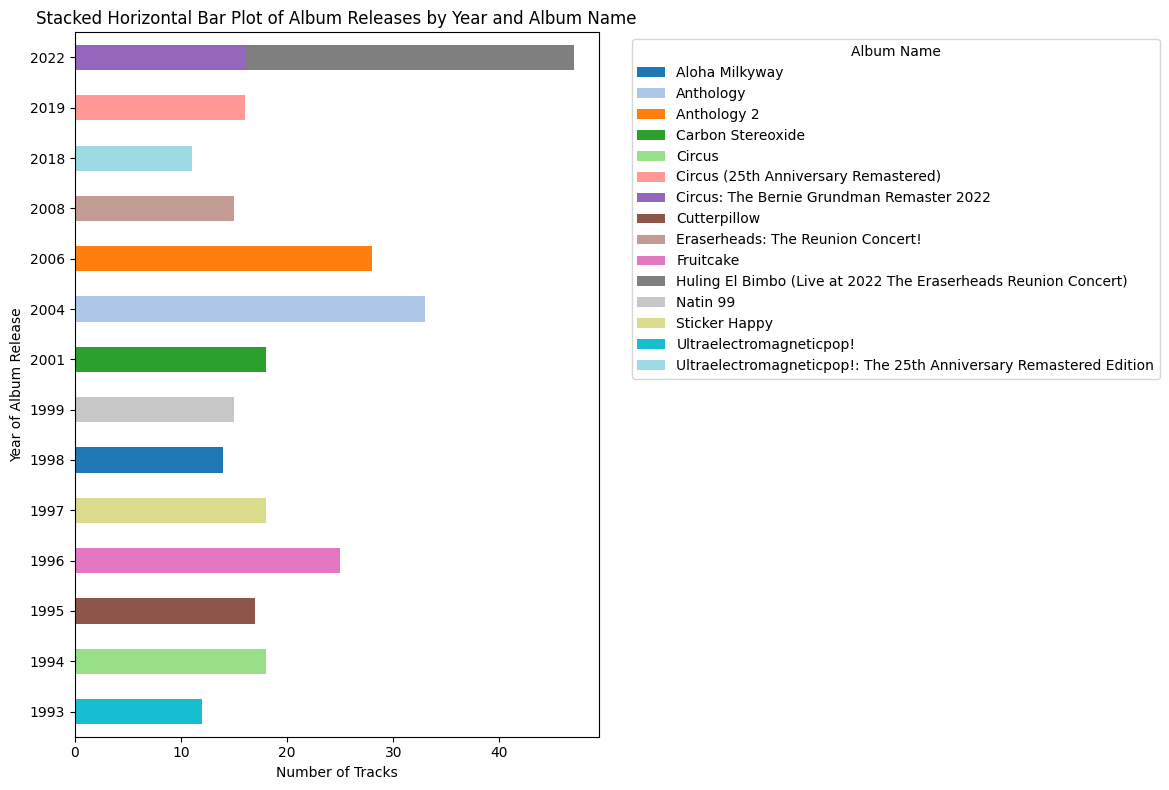

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'album_release_date' is a column in it.

# Convert the album_release_date to datetime format if it's not already
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')

# Extract the year from the album_release_date column
df['release_year'] = df['album_release_date'].dt.year

# Group the data by 'release_year' and 'album_name' and count the number of tracks
album_year_counts = df.groupby(['release_year', 'album_name']).size().unstack(fill_value=0)

# Create a horizontal stacked bar plot
album_year_counts.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='tab20')

# Add title and labels
plt.title('Stacked Horizontal Bar Plot of Album Releases by Year and Album Name')
plt.ylabel('Year of Album Release')
plt.xlabel('Number of Tracks')
plt.legend(title='Album Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


# Correlation of Audio Features

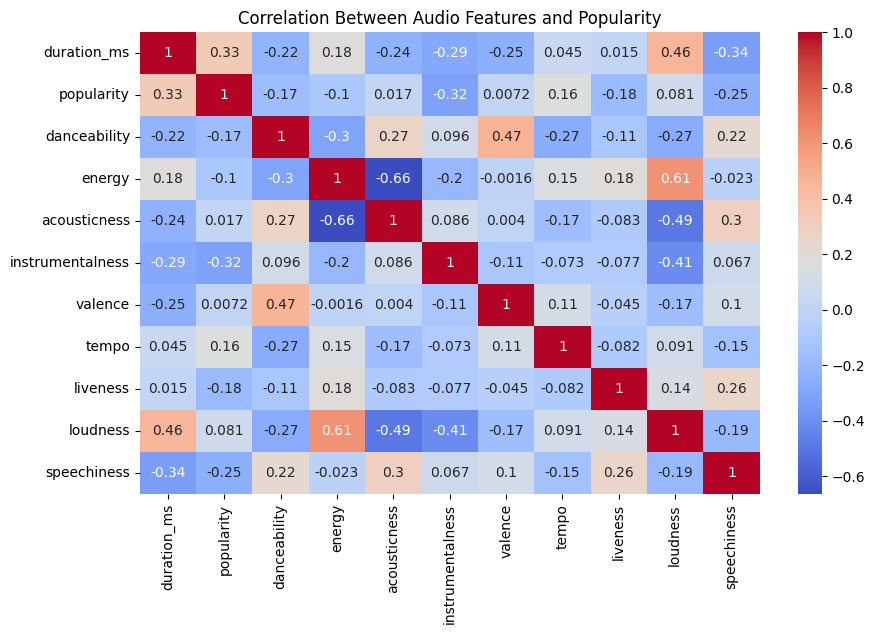

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the relevant audio features and popularity
audio_features = df[['duration_ms', 'popularity', 'danceability', 'energy', 
                     'acousticness', 'instrumentalness', 'valence', 
                     'tempo', 'liveness', 'loudness', 'speechiness']]

# Compute the correlation matrix
corr_matrix = audio_features.corr()

# Plot the heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Audio Features and Popularity')
plt.show()


# Modelling

# Popularity Analysis

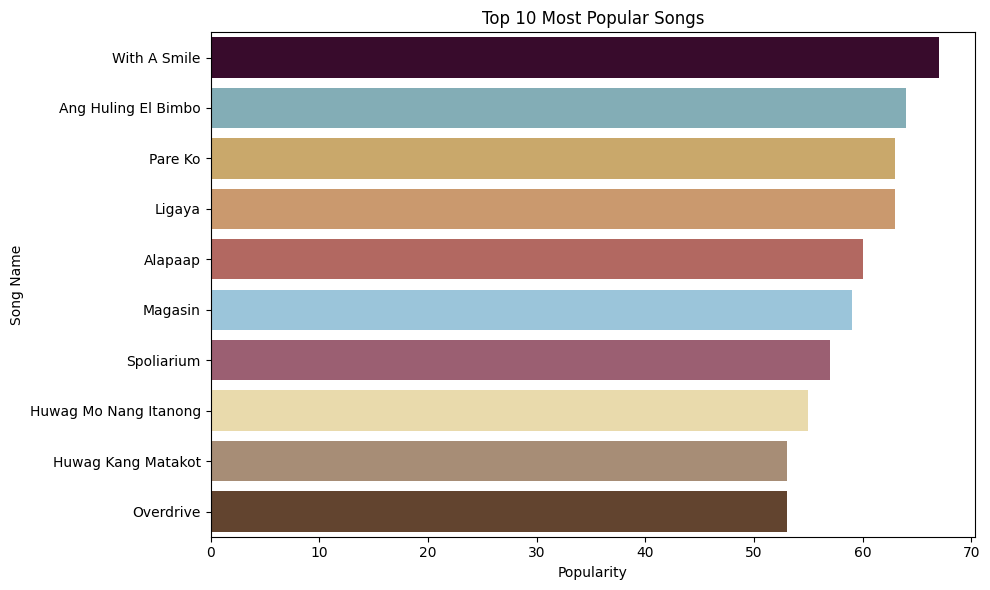

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'popularity' is a column in it.

# Sort the DataFrame by 'popularity' and select the top 10 unique tracks
top_10 = df.sort_values(by='popularity', ascending=False).drop_duplicates('track_name').head(10)

# Set the custom color palette (ensure the palette has exactly 10 colors)
custom_palette = ['#400330', '#7AB3BF', '#D9AD5B', '#D9985F', '#BF5D54', 
                  '#91C8E4', '#A5556E', '#F3DFA2', '#AF8C6E', '#6B4226']

# Create a bar plot with hue and set legend to False
plt.figure(figsize=(10, 6))
sns.barplot(x='popularity', y='track_name', data=top_10, palette=custom_palette[:len(top_10)], dodge=False)

# Add a title and labels
plt.title('Top 10 Most Popular Songs')
plt.xlabel('Popularity')
plt.ylabel('Song Name')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()


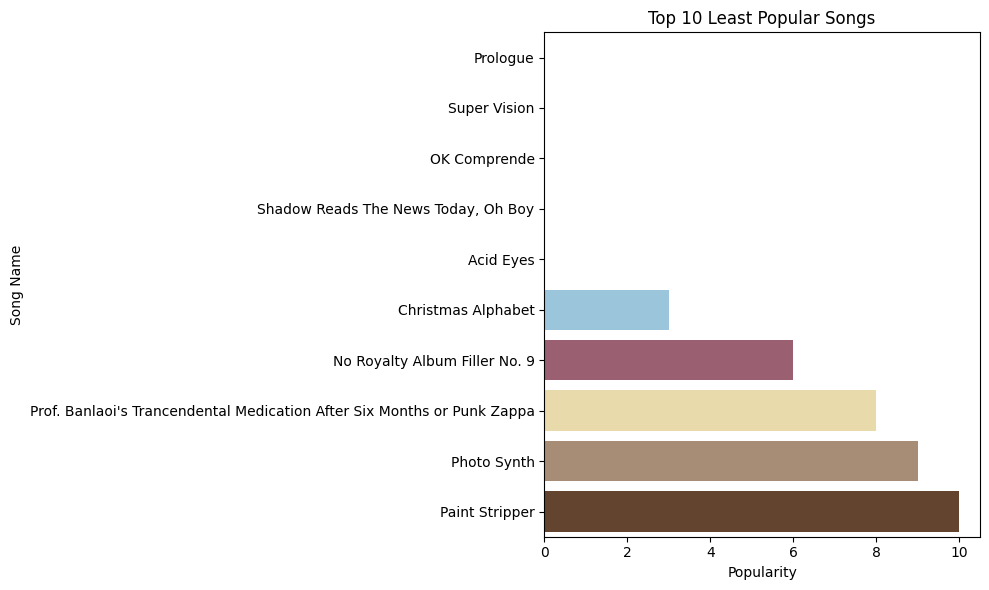

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'popularity' is a column in it.

# Sort the DataFrame by 'popularity' in ascending order and select the top 10 unique least popular tracks
bottom_10 = df.sort_values(by='popularity', ascending=True).drop_duplicates('track_name').head(10)

# Set the custom color palette (ensure the palette has exactly 10 colors)
custom_palette = ['#400330', '#7AB3BF', '#D9AD5B', '#D9985F', '#BF5D54', 
                  '#91C8E4', '#A5556E', '#F3DFA2', '#AF8C6E', '#6B4226']

# Create a bar plot with hue and set legend to False
plt.figure(figsize=(10, 6))
sns.barplot(x='popularity', y='track_name', data=bottom_10, palette=custom_palette[:len(bottom_10)], dodge=False)

# Add a title and labels
plt.title('Top 10 Least Popular Songs')
plt.xlabel('Popularity')
plt.ylabel('Song Name')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


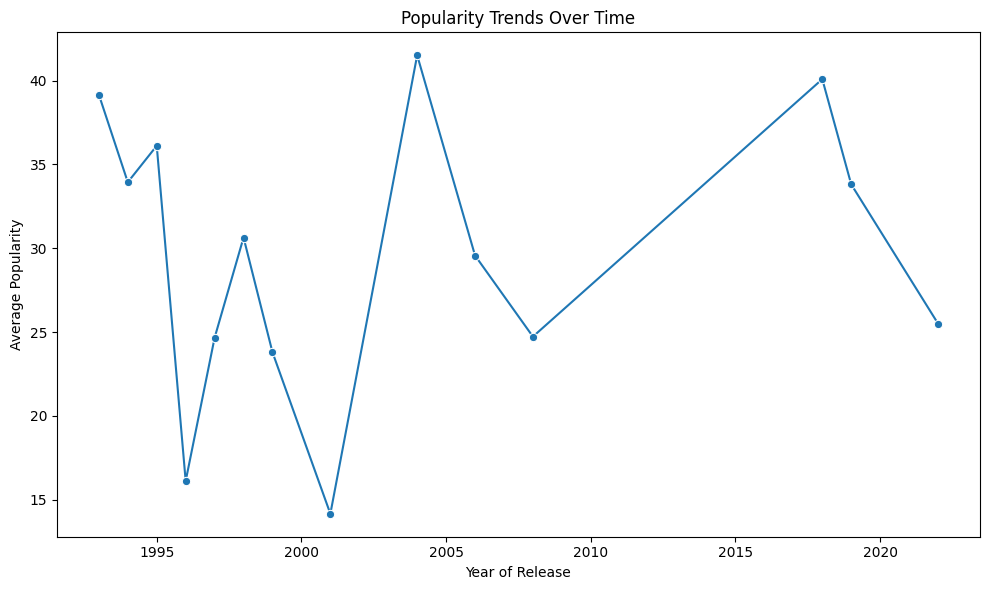

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'album_release_date' and 'popularity' are columns in it.

# Convert the album_release_date to datetime format if it's not already
df['album_release_date'] = pd.to_datetime(df['album_release_date'], errors='coerce')

# Sort the DataFrame by the release date
df = df.sort_values(by='album_release_date')

# Group by year and calculate the mean popularity per year
df['release_year'] = df['album_release_date'].dt.year
popularity_trend = df.groupby('release_year')['popularity'].mean().reset_index()

# Plot the popularity trend over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='release_year', y='popularity', data=popularity_trend, marker='o')

# Add title and labels
plt.title('Popularity Trends Over Time')
plt.xlabel('Year of Release')
plt.ylabel('Average Popularity')

# Show the plot
plt.tight_layout()
plt.show()


In [13]:
# Find the longest track by duration
longest_track = df.loc[df['duration_ms'].idxmax()]

# Display the longest track information
print(f"Longest Track: {longest_track['track_name']}")
print(f"Duration (ms): {longest_track['duration_ms']}")
print(f"Album Name: {longest_track['album_name']}")
print(f"Popularity: {longest_track['popularity']}")


Longest Track: Huling El Bimbo - Live at 2022 The Eraserheads Reunion Concert
Duration (ms): 573149
Album Name: Huling El Bimbo (Live at 2022 The Eraserheads Reunion Concert)
Popularity: 23


## Word Cloud

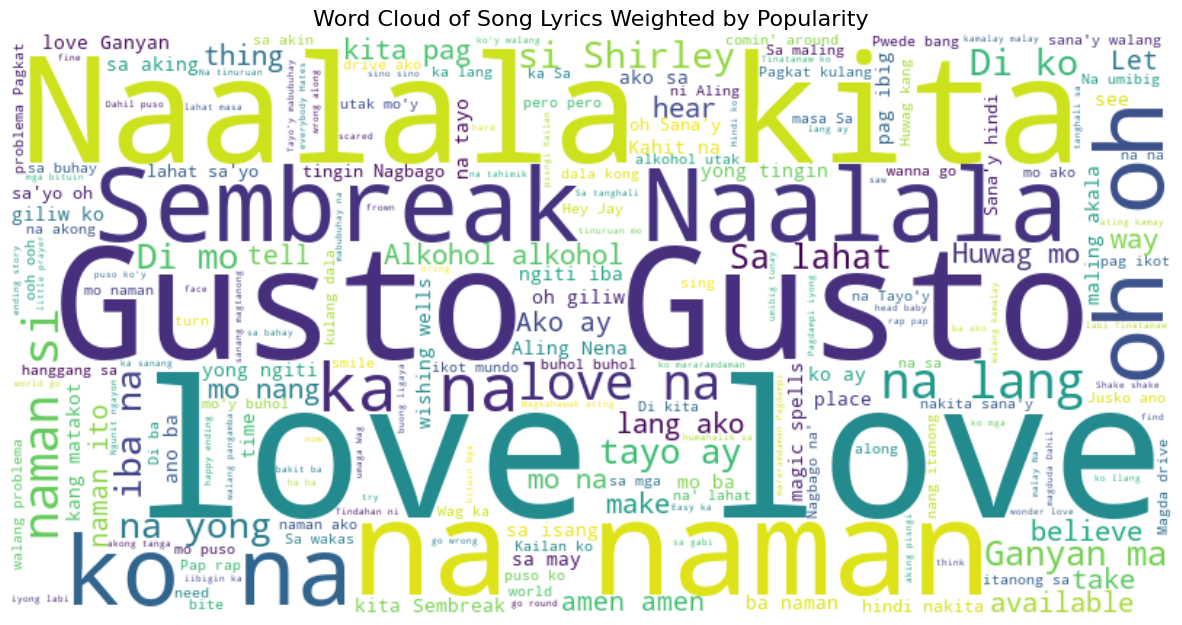

In [14]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to remove specific words and phrases from text
def remove_specific_words(text):
    # List of words and phrases to remove
    words_to_remove = ['chu', 'chut', 'ru', 'rut', 'ang', 'ng', 'ah', 'la', 'doo', 'oooh', 'ra', 'ha ha', 'mo bang', 'pa']
    # Regular expression to remove words or phrases
    pattern = r'\b(?:' + '|'.join(words_to_remove) + r')\b'
    cleaned_text = re.sub(pattern, '', text, flags=re.IGNORECASE)  # Case-insensitive removal
    return cleaned_text

# Apply the function to remove specific words/phrases from the lyrics, including neutral sentiment
df['lyrics_cleaned'] = df['lyrics_cleaned'].apply(remove_specific_words)

# Create a string where more popular songs' lyrics (including all sentiments and removed words/phrases) are repeated based on their popularity
weighted_lyrics = ' '.join(df.apply(lambda row: ' '.join([row['lyrics_cleaned']] * int(row['popularity'])), axis=1))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(weighted_lyrics)

# Display the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for better display
plt.title('Word Cloud of Song Lyrics Weighted by Popularity', fontsize=16)
plt.show()


# Sentiment Analysis using RoBERTa model (Tagalog & English)

More info: https://huggingface.co/dost-asti/RoBERTa-tl-sentiment-analysis

In [15]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("dost-asti/RoBERTa-tl-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("dost-asti/RoBERTa-tl-sentiment-analysis")

# Move the model to device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Define sentiment label mapping
LABELS = {0: 'negative', 1: 'neutral', 2: 'positive'}

# Function to predict sentiment
def predict_sentiment(text):
    # Tokenize the input text and truncate it to a maximum length
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128).to(device)
    
    # Run the model and get logits (raw predictions)
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Extract logits and get the predicted class (highest logit value)
    logits = outputs.logits
    predicted_class_id = torch.argmax(logits, dim=1).item()

    # Convert class id to human-readable label
    predicted_label = LABELS[predicted_class_id]
    
    return predicted_label

# Ensure the DataFrame has valid text data and drop rows with "Not available" or NaN values
df_cleaned = df[(df['lyrics_cleaned'] != 'Not available') & df['lyrics_cleaned'].notna()].copy()

if 'lyrics_cleaned' in df_cleaned.columns and df_cleaned['lyrics_cleaned'].notna().all():
    # Apply the sentiment prediction function to the 'lyrics_cleaned' column using .loc to avoid the warning
    df_cleaned['sentiment'] = df_cleaned['lyrics_cleaned'].apply(predict_sentiment)

    # Display the DataFrame with sentiment predictions
    print(df_cleaned[['track_name', 'lyrics_cleaned', 'sentiment']])
else:
    print("Error: 'lyrics_cleaned' column not found or contains missing values.")



tokenizer_config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/469k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/269k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.25M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/908 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

                                            track_name  \
246                                            Ganjazz   
51                              Tindahan Ni Aling Nena   
244                                Honky-Toinks Granny   
53                                             Shirley   
47                               Walang Hiyang Pare Ko   
..                                                 ...   
234                      No Royalty Album Filler No. 9   
235                                            Magasin   
236                                       Butterscotch   
230                                       With A Smile   
26   Magasin - Live at 2022 The Eraserheads Reunion...   

                                        lyrics_cleaned sentiment  
246  Ba-bap-pap-parap\nBa-bap-pap-pap 100x/emc2\n(@...   neutral  
51   \nIsang araw\n\nPumunta ako sa tindahan ni Ali...  negative  
244  \nWell, my lola she told me\nWell, she told me...   neutral  
53   \nIn love na naman si Shirley\

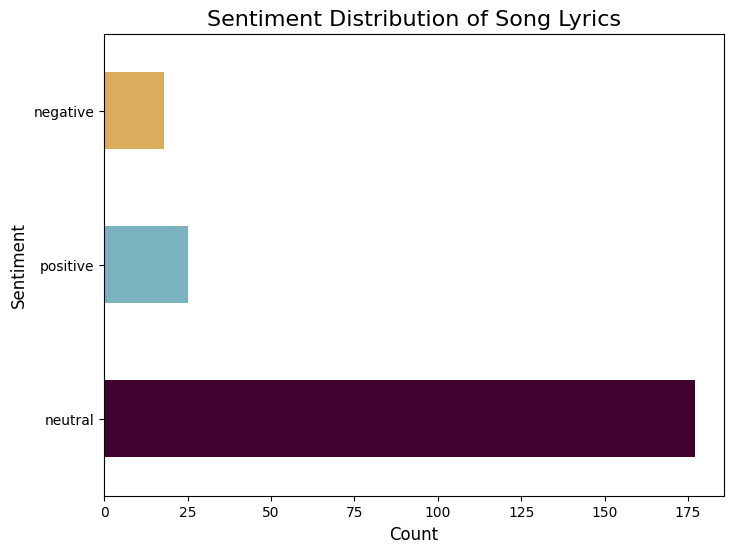

In [16]:
import matplotlib.pyplot as plt

# Assuming sentiment analysis is already applied and stored in df['sentiment']

# Count the occurrences of each sentiment
sentiment_counts = df_cleaned['sentiment'].value_counts()

# Define the custom color palette using your provided colors
custom_colors = ['#400330', '#7AB3BF', '#D9AD5B', '#D9985F', '#BF5D54']

# Plotting the horizontal bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='barh', color=custom_colors[:len(sentiment_counts)])  # Changed 'bar' to 'barh'

# Adding titles and labels
plt.title('Sentiment Distribution of Song Lyrics', fontsize=16)
plt.ylabel('Sentiment', fontsize=12)  # Swapped x and y labels
plt.xlabel('Count', fontsize=12)

# Show the plot
plt.show()


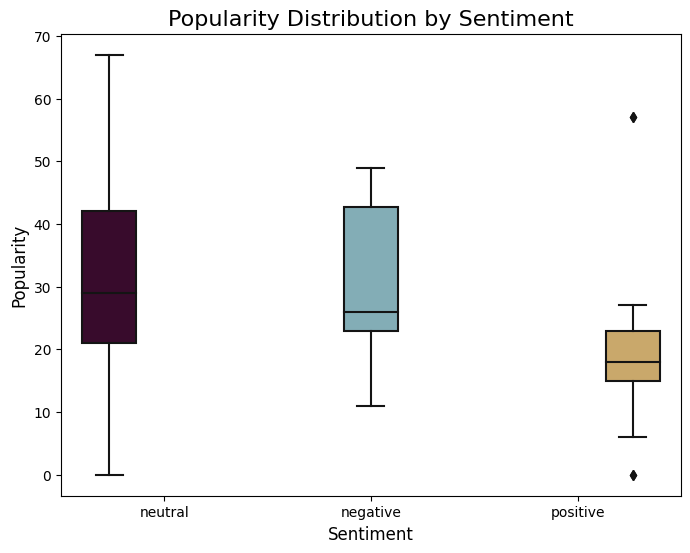


Sample track per sentiment grouping:


,track_name,popularity,sentiment
51,Tindahan Ni Aling Nena,49,negative
212,With A Smile,67,neutral
147,Spoliarium,57,positive


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the box plot to show the distribution of popularity per sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='popularity', data=df_cleaned, hue='sentiment', palette=custom_colors[:3])

# Adding titles and labels
plt.title('Popularity Distribution by Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Popularity', fontsize=12)

# Optionally, if you want to remove the legend, do this:
plt.legend([],[], frameon=False)

# Show the plot
plt.show()

print()

print('Sample track per sentiment grouping:')
# Get the track with the highest popularity for each sentiment
examples = df_cleaned.loc[df_cleaned.groupby('sentiment')['popularity'].idxmax()][['track_name', 'popularity', 'sentiment']]

# Display the examples
examples.head()


# Negative songs: Most played song and medyo consistent ang popularity.
# Neutral songs: Iba-iba ang popularity—sobrang sikat yung iba, yung iba naman hindi masyado.
# Positive songs: Kadalasan hindi masyadong sikat, pero may ilang hit na hit.

In [18]:
import pandas as pd

# Ensure the DataFrame has valid text data and drop rows with "Not available" or NaN values in df_cleaned
df_cleaned = df_cleaned[(df_cleaned['lyrics_cleaned'] != 'Not available') & df_cleaned['lyrics_cleaned'].notna()]

if 'lyrics_cleaned' in df_cleaned.columns and 'sentiment' in df_cleaned.columns and df_cleaned['lyrics_cleaned'].notna().all():
    # Step 1: Convert sentiment into numerical values using .loc to avoid the warning
    sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
    df_cleaned.loc[:, 'sentiment_numerical'] = df_cleaned['sentiment'].map(sentiment_mapping)

    # Step 2: Ensure popularity is numeric using .loc to avoid the warning
    df_cleaned.loc[:, 'popularity'] = pd.to_numeric(df_cleaned['popularity'], errors='coerce')

    # Step 3: Perform correlation between sentiment and popularity
    correlation = df_cleaned[['sentiment_numerical', 'popularity']].corr()

    # Display the correlation matrix
    print(correlation)
else:
    print("Error: 'lyrics_cleaned' or 'sentiment' column not found or contains missing values.")


                     sentiment_numerical  popularity
sentiment_numerical             1.000000   -0.172912
popularity                     -0.172912    1.000000


### The data shows that more positive songs tend to be slightly less popular, this effect is not strong, and other factors likely have a more significant influence on popularity.

# MODELING

## Split data in features and target variable

In [19]:

from sklearn.model_selection import train_test_split


X = df_cleaned[['duration_ms', 'danceability', 'energy', 'acousticness', 
                'instrumentalness', 'valence', 'tempo', 'liveness', 
                'loudness', 'speechiness', 'sentiment_numerical']]

# Target variable (popularity)
y = df_cleaned['popularity']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




## Random Forest

                feature  importance
0           duration_ms    0.308639
4      instrumentalness    0.209080
1          danceability    0.081732
8              loudness    0.072236
5               valence    0.062339
2                energy    0.059795
6                 tempo    0.056881
9           speechiness    0.054025
3          acousticness    0.047240
7              liveness    0.039485
10  sentiment_numerical    0.008546


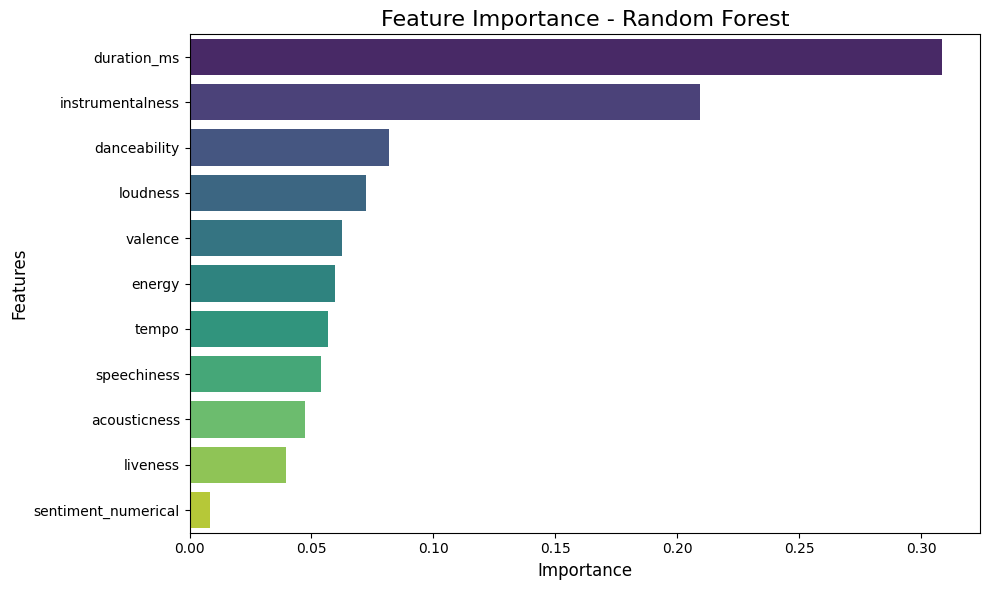

In [20]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importance_df)

# Sort the feature importance DataFrame
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the feature importance using seaborn's barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette="viridis")

# Add titles and labels
plt.title('Feature Importance - Random Forest', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()



# XGBoost

                feature  importance
10  sentiment_numerical    0.196022
4      instrumentalness    0.177737
0           duration_ms    0.163437
8              loudness    0.161905
1          danceability    0.087542
5               valence    0.049090
2                energy    0.040480
7              liveness    0.034749
6                 tempo    0.031418
3          acousticness    0.030483
9           speechiness    0.027137


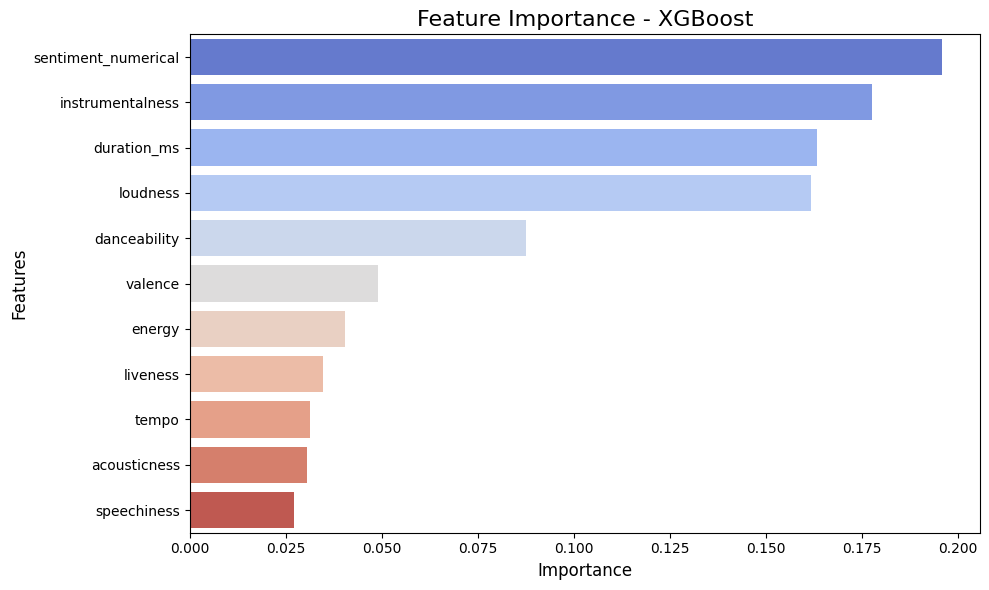

In [21]:
from xgboost import XGBRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Train an XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Get feature importances
importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(feature_importance_df)


# Sort the feature importance DataFrame
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot the feature importance using seaborn's barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette="coolwarm")

# Add titles and labels
plt.title('Feature Importance - XGBoost', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001576 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 525
[LightGBM] [Info] Number of data points in the train set: 176, number of used features: 10
[LightGBM] [Info] Start training from score 31.522727
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

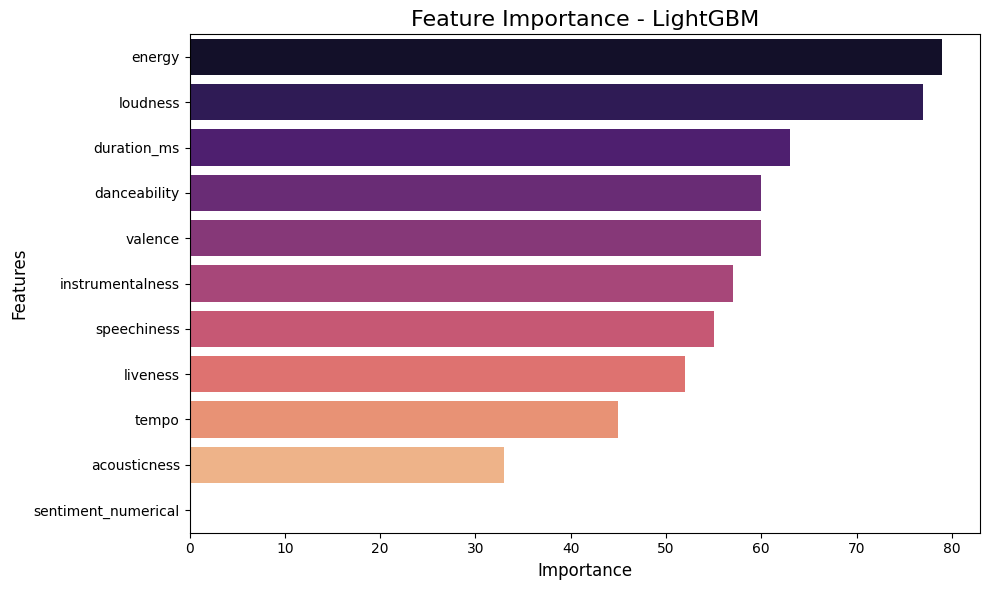

In [22]:
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume X_train, X_test, y_train, y_test are already defined.

# Initialize and train the LightGBM model
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

# Get feature importance
feature_importances = lgb_model.feature_importances_

# Create a DataFrame to hold feature names and their corresponding importance scores
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette="magma")
plt.title('Feature Importance - LightGBM', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


# Which model is the most accurate?

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Random Forest Predictions
y_pred_rf = rf_model.predict(X_test)

# XGBoost Predictions
y_pred_xgb = xgb_model.predict(X_test)

# LightGBM Predictions
y_pred_lgb = lgb_model.predict(X_test)


def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2}

# Random Forest Evaluation
rf_metrics = evaluate_model(y_test, y_pred_rf)
print("Random Forest Performance:", rf_metrics)

# XGBoost Evaluation
xgb_metrics = evaluate_model(y_test, y_pred_xgb)
print("XGBoost Performance:", xgb_metrics)

# LightGBM Evaluation
lgb_metrics = evaluate_model(y_test, y_pred_lgb)
print("LightGBM Performance:", lgb_metrics)


Random Forest Performance: {'MAE': 6.15090909090909, 'MSE': 77.40282727272728, 'RMSE': 8.797887659701463, 'R²': 0.6728032158118026}
XGBoost Performance: {'MAE': 6.117166288874366, 'MSE': 103.12348150551584, 'RMSE': 10.154973240019682, 'R²': 0.5640770148613855}
LightGBM Performance: {'MAE': 6.82529344789727, 'MSE': 87.89449280571768, 'RMSE': 9.375206280702184, 'R²': 0.6284529078950507}


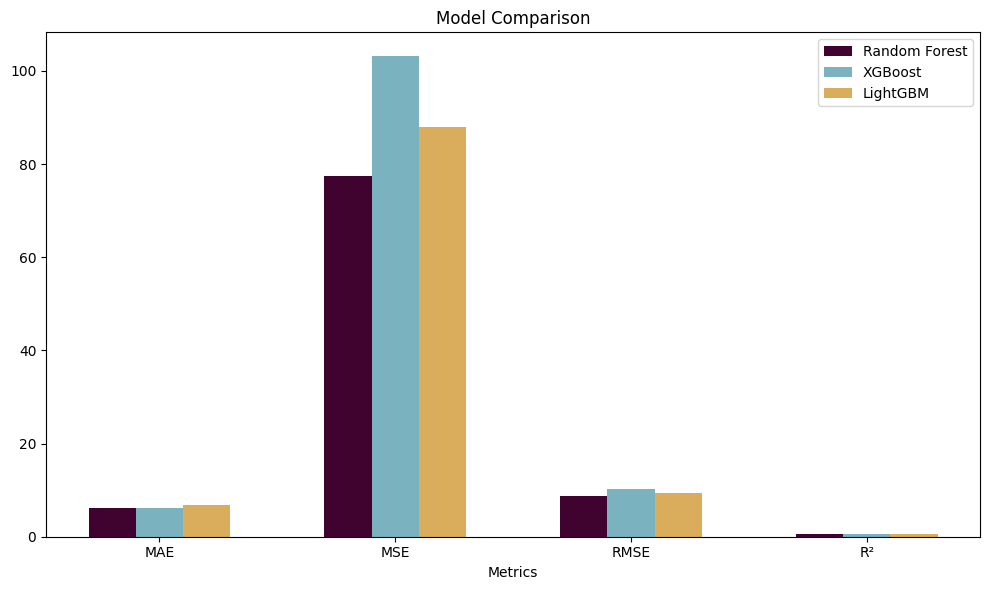

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Define the custom colors you want to use
custom_colors = ['#400330', '#7AB3BF', '#D9AD5B', '#D9985F', '#BF5D54']

# Data to plot (assuming you've already evaluated the models)
labels = ['MAE', 'MSE', 'RMSE', 'R²']
rf_values = list(rf_metrics.values())
xgb_values = list(xgb_metrics.values())
lgb_values = list(lgb_metrics.values())

# Plotting
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Using the custom colors for each model
rects1 = ax.bar(x - width, rf_values, width, label='Random Forest', color=custom_colors[0])
rects2 = ax.bar(x, xgb_values, width, label='XGBoost', color=custom_colors[1])
rects3 = ax.bar(x + width, lgb_values, width, label='LightGBM', color=custom_colors[2])

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


# Random Forest outperforms both XGBoost and LightGBM in all metrics (MAE, MSE, RMSE, and R²), making it the best model of the three.
### XGBoost has the highest MSE and RMSE, which means it tends to make larger errors compared to the other models.
### LightGBM is in between, performing better than XGBoost but not as well as Random Forest in terms of both MAE and RMSE.

# Hyperparameter Tuning

# Random Forest - Optimization

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np
import os

# Disable Hugging Face tokenizers parallelism warning
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Define the updated parameter grid
param_grid = {
    'n_estimators': [100, 200, 500, 1000],           # Number of trees
    'max_depth': [10, 20, 30, None],                 # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                 # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],                   # Minimum samples required at each leaf node
    'max_features': ['sqrt', 'log2', None],          # Corrected: Removed 'auto'
    'bootstrap': [True, False]                       # Whether to use bootstrap samples
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Use RandomizedSearchCV to tune hyperparameters
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=100, scoring=make_scorer(mean_squared_error, greater_is_better=False), 
                                   cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV model
random_search.fit(X_train, y_train)

# Output the best parameters found
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the best model
best_rf = random_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Calculate the RMSE for the tuned model
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
print("Tuned Random Forest RMSE:", rmse_best_rf)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   1.8s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   3.5s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   3.5s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=2

                feature  importance
0           duration_ms    0.200841
4      instrumentalness    0.134826
8              loudness    0.125612
1          danceability    0.088387
9           speechiness    0.080065
3          acousticness    0.079103
2                energy    0.070861
6                 tempo    0.069651
5               valence    0.063395
7              liveness    0.053050
10  sentiment_numerical    0.034208


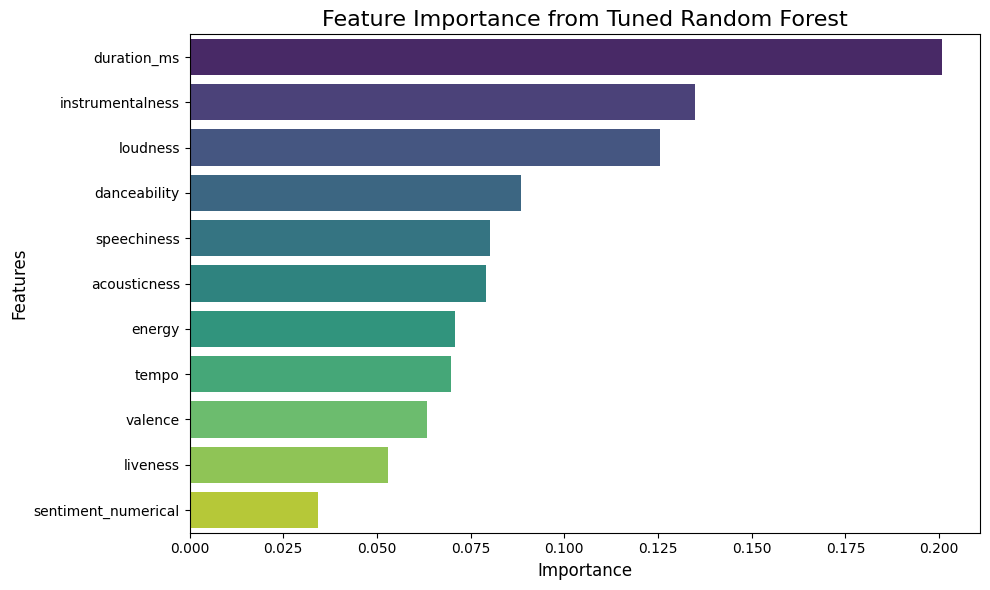

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have already found the best Random Forest model
best_rf = random_search.best_estimator_

# Get feature importances from the best model
importances = best_rf.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Print the feature importance DataFrame
print(feature_importance_df)

# Visualize the feature importance using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')

# Add titles and labels
plt.title('Feature Importance from Tuned Random Forest', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# Comparison from Baseline and Tuned Random Forest

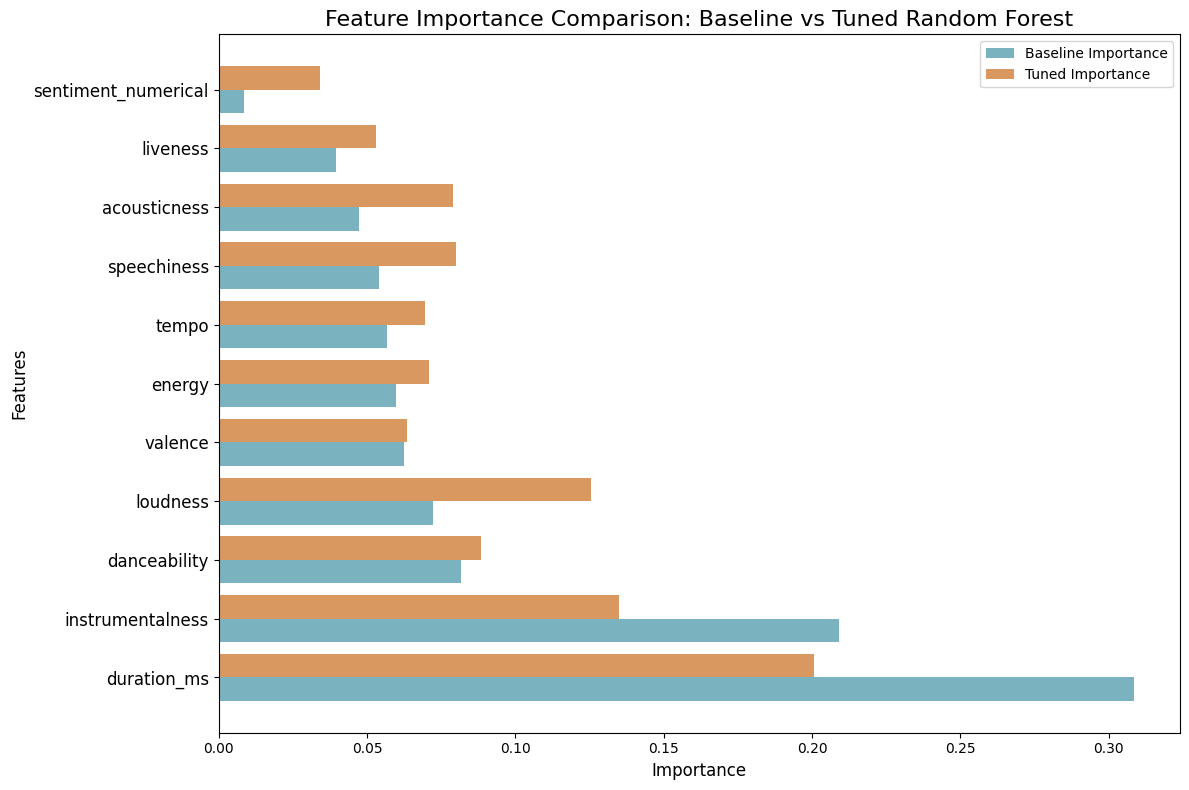

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Extract feature importances from the baseline model (before tuning)
baseline_rf = RandomForestRegressor(random_state=42)
baseline_rf.fit(X_train, y_train)
baseline_importances = baseline_rf.feature_importances_

# 2. Extract feature importances from the tuned model (after RandomizedSearchCV)
tuned_rf = random_search.best_estimator_  # Best tuned model from RandomizedSearchCV
tuned_importances = tuned_rf.feature_importances_

# 3. Create DataFrames for both baseline and tuned importances
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'baseline_importance': baseline_importances,
    'tuned_importance': tuned_importances
}).sort_values(by='baseline_importance', ascending=False)

# 4. Plot the comparison with two distinct colors
plt.figure(figsize=(12, 8))

# Define the position of bars
x = range(len(feature_importance_df))

# Plot baseline importances in one color
plt.barh(x, feature_importance_df['baseline_importance'], color="#7AB3BF", height=0.4, label="Baseline Importance")

# Plot tuned importances in another color, offset slightly for visibility
plt.barh([i + 0.4 for i in x], feature_importance_df['tuned_importance'], color="#D9985F", height=0.4, label="Tuned Importance")

# Add the feature labels to the y-axis
plt.yticks([i + 0.2 for i in x], feature_importance_df['feature'], fontsize=12)

# Add titles and labels
plt.title('Feature Importance Comparison: Baseline vs Tuned Random Forest', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Add legend
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


## Based on this chart, the tuned model has shifted more importance towards instrumentalness, while duration_ms remains a key feature but with slightly reduced importance. Other features such as danceability and loudness have become less important after tuning.

# Final answer:

# To predict the potential success of an Eraserheads song based on its lyrical content and audio features, these are the things to look for: 

# *the duration of the song
# *higher instrumentals portion and less vocals
# *high danceability 
# *loudness - they have recorded live performances in Spotify so that's also a factor, some listeners prefer live performances

# Based on the most performing model, the sentiment either positive or negative have the least impact on popularity. In short, Eraserheads' music cater to a diverse feelszzz, pwede sa emo or sa nonchalant lang, popular pa rin. Hehehe

# Kaso disbanded na sila since 2022 🫠🫠